# Analise Enron DataSet
# Machine Learning
## Talita Barcelos


In [29]:
import sys
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%pylab inline

def gera_grafico(dados, x, y, ponto):

    eixox = []
    eixoy = []
    eixoz = []

    for nome in dados:

        eixox.append(dados[nome][x])
        eixoy.append(dados[nome][y])
        eixoz.append(dados[nome][ponto])


    plt.scatter(eixox, eixoy,c=eixoz)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(eixoz)
    plt.show()

    pass


with open("D:/Talita/Pessoal/Udacity/Machine Learning/Miniprojetos/ud120-projects-master/final_project/final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

#verificando quantas pessoas existem no data set
len(data_dict)

Populating the interactive namespace from numpy and matplotlib


146

In [35]:
#contanto qutas caracteristias tem no data set
len(data_dict['LOCKHART EUGENE E'].keys())

21

In [31]:
#contanto numero de POI´s
count = 0
for p in data_dict:
    if data_dict[p]['poi'] == 1:
        count = count + 1

print count

18


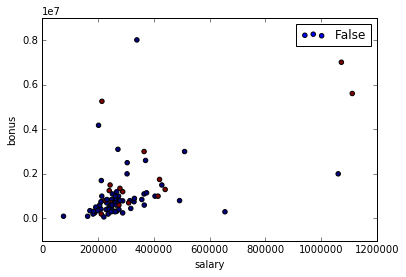

In [16]:
gera_grafico(data_dict, "salary", "bonus", "poi")

Existe um outlier atrapalhando a interpretação. Vou remover o outlier para continuar a fazer a melhor seleção de feature.

In [36]:
#Remove outliers
#remove outlier Total
data_dict.pop('TOTAL',0)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK',0)
data_dict.pop('LOCKHART EUGENE E',0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

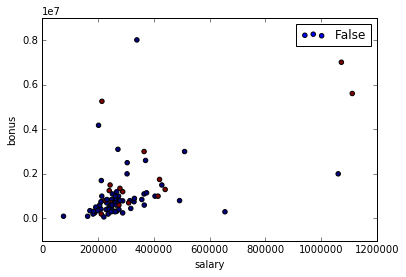

In [3]:
#visualiza como ficou o grafico apos remocao outiler
gera_grafico(data_dict, "salary", "bonus", "poi")

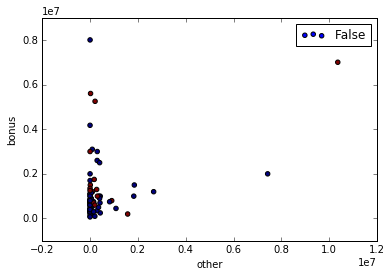

In [4]:
gera_grafico(data_dict,"other", "bonus",'poi')

A maior parte dos others estão concentradas no 0, não existe um indicativo muito forte nessa variável. Existe um outlier mas não há nenhum indicio de que seja um erro.

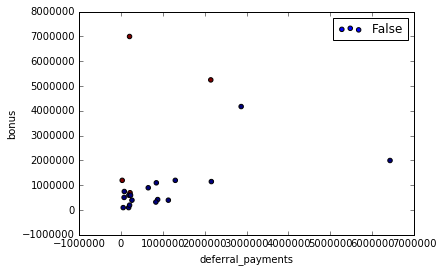

In [5]:
gera_grafico(data_dict,"deferral_payments", "bonus",'poi')

Percebe-se uma relação entre quem é POI e quem não é. Os POI no geral tem um bonus acima de 1000000

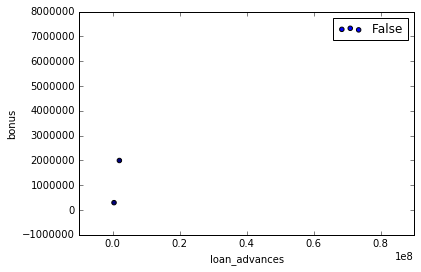

In [6]:
gera_grafico(data_dict,"loan_advances", "bonus",'poi')

Existem muitos NA´s, somente três pontos tem valores dificultando muito qualquer análise.

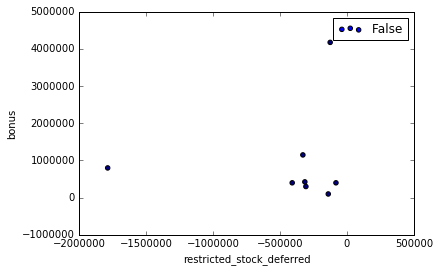

In [7]:
gera_grafico(data_dict,"restricted_stock_deferred", "bonus",'poi')

Existem muitos NA´s, somente 8 pontos tem valores dificultando muito qualquer análise.

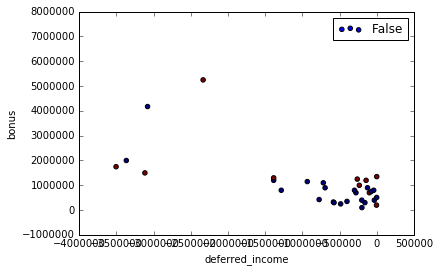

In [8]:
gera_grafico(data_dict,"deferred_income", "bonus",'poi')

Os PO se agrupam ou em Bonus muito altos ou em bonus baixos e deferred_income  proximop de 0.

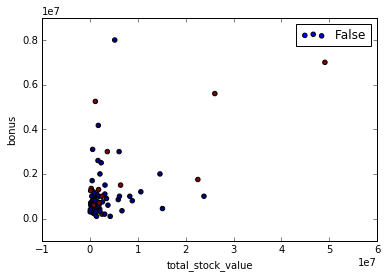

In [9]:
gera_grafico(data_dict,"total_stock_value", "bonus",'poi')

A maioria das pessoas tem um total_stock_value proximo de 0, no entanto grande parte  dos maiores valores de stock vem PO´s

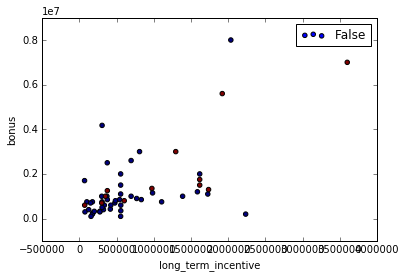

In [10]:
gera_grafico(data_dict,"long_term_incentive", "bonus",'poi')

Não conseguir ver nenhuma correlação das expenses e bonus

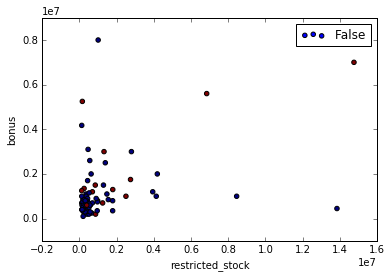

In [11]:
gera_grafico(data_dict,"restricted_stock", "bonus",'poi')

Não conseguir ver nenhuma correlação das expenses e bonus

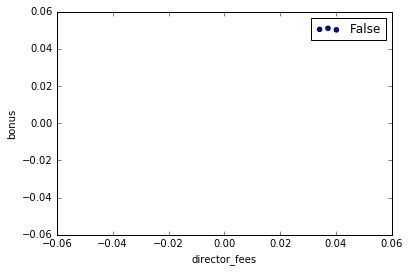

In [12]:
gera_grafico(data_dict,"director_fees", "bonus",'poi')

As pessoas que receberam Director Fees não possuem bonus nem salarios

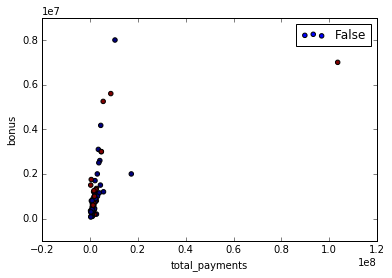

In [13]:
gera_grafico(data_dict,"total_payments", "bonus",'poi')

Existe um outlier que se destaca FREVERT, MARK A, não aparenta ser um erro.  Para existir uma linha fazendo uma correçãoa entre essas duas variaveis para PO´s

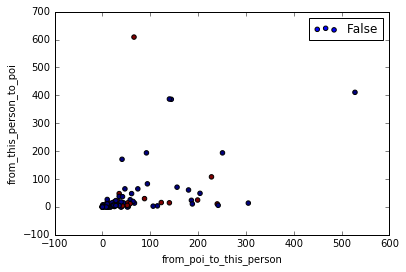

In [14]:
gera_grafico(data_dict,"from_poi_to_this_person","from_this_person_to_poi",'poi')

Existe um outlier que recebeu muitos e-mail de um POI, mais do que o restante das pessoas

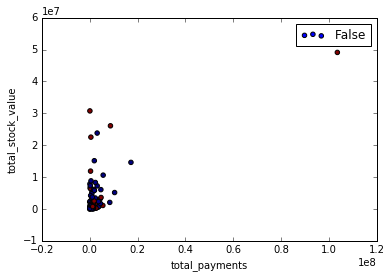

In [15]:
gera_grafico(data_dict,"total_payments","total_stock_value",'poi')

Existe um outlier com um valor muito alto de pagamento e de stock. Também existem pessoas com valores zerados de stock e pagamentos.

Com essas análises acho que seria prudente retirar as features 'email_address", "restricted_stock_deferred", "others","loan_advances","director_fees".